In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

location  total_sqft  bath   price  BHK
0  Electronic City Phase II      1056.0   2.0   39.07    2
1          Chikka Tirupathi      2600.0   5.0  120.00    4
2               Uttarahalli      1440.0   2.0   62.00    3
3        Lingadheeranahalli      1521.0   3.0   95.00    3
4                  Kothanur      1200.0   2.0   51.00    2

In [3]:
df.shape

(11562, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11562 entries, 0 to 11561
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    11562 non-null  object 
 1   total_sqft  11562 non-null  float64
 2   bath        11562 non-null  float64
 3   price       11562 non-null  float64
 4   BHK         11562 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 451.8+ KB


In [5]:
df.describe()

total_sqft          bath         price           BHK
count  11562.000000  11562.000000  11562.000000  11562.000000
mean    1420.982350      2.578274     93.404798      2.707577
std      580.907282      1.078915     69.033459      1.062705
min        1.000000      1.000000      8.000000      1.000000
25%     1093.000000      2.000000     50.000000      2.000000
50%     1260.500000      2.000000     70.000000      3.000000
75%     1625.000000      3.000000    110.000000      3.000000
max     3800.000000      8.000000    430.000000      8.000000

In [15]:
location_counts = df['location'].value_counts()
df['location'] = df['location'].map(location_counts)

In [18]:
df.head()

location_count  total_sqft  bath   price  BHK
0             106      1056.0   2.0   39.07    2
1              15      2600.0   5.0  120.00    4
2             142      1440.0   2.0   62.00    3
3              23      1521.0   3.0   95.00    3
4              58      1200.0   2.0   51.00    2

In [17]:
df.rename(columns={'location':'location_count'}, inplace=True)

In [19]:
df.head()

location_count  total_sqft  bath   price  BHK
0             106      1056.0   2.0   39.07    2
1              15      2600.0   5.0  120.00    4
2             142      1440.0   2.0   62.00    3
3              23      1521.0   3.0   95.00    3
4              58      1200.0   2.0   51.00    2

In [21]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [23]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [41]:
mse_lr

2121.0307082900617

In [42]:
r2_lr

0.5747993783494871

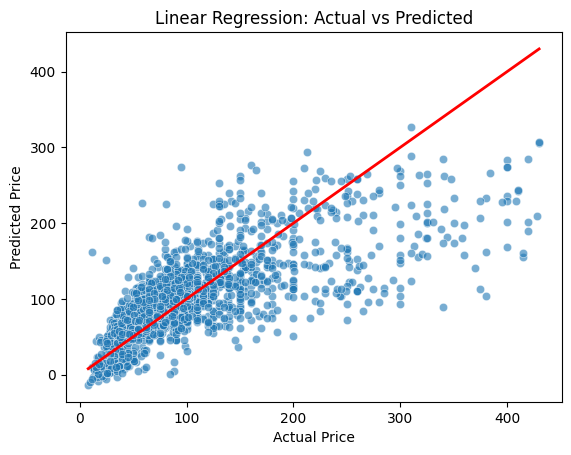

In [26]:
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

In [27]:
X_numeric = df[['total_sqft', 'bath', 'BHK']]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_numeric = poly.fit_transform(X_numeric)

In [28]:
poly_columns = poly.get_feature_names_out(['total_sqft', 'bath', 'BHK'])
df_poly_numeric = pd.DataFrame(X_poly_numeric, columns=poly_columns)


In [29]:
X_location = df.drop(['price', 'total_sqft', 'bath', 'BHK'], axis=1).reset_index(drop=True)
X_poly = pd.concat([df_poly_numeric, X_location], axis=1)
y_poly = df['price']

In [30]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)


In [31]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)

In [33]:
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f"Polynomial Regression:\nMSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")


Polynomial Regression:
MSE: 2046.15, R²: 0.59


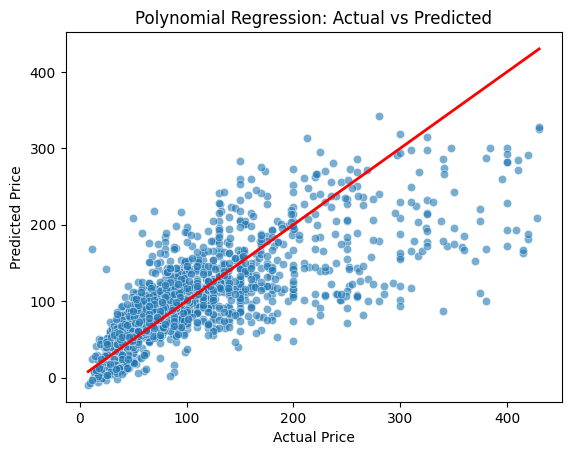

In [40]:
sns.scatterplot(x=y_test_poly, y=y_pred_poly, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], color='red', linewidth=2)

## Ridge Regression

Ridge Regression:
MSE: 2121.03, R²: 0.57


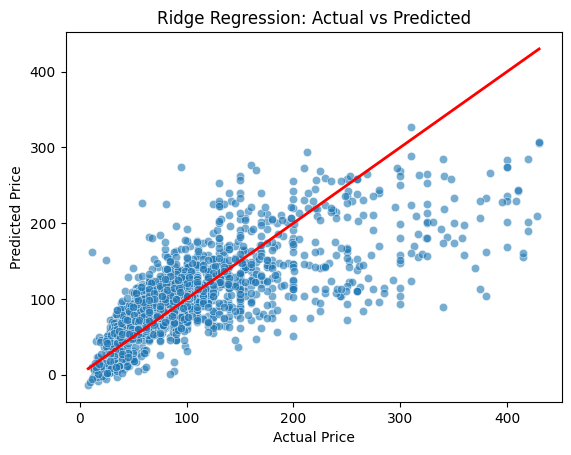

In [44]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression:\nMSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")

sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)

Lasso Regression:
MSE: 2120.55, R²: 0.57


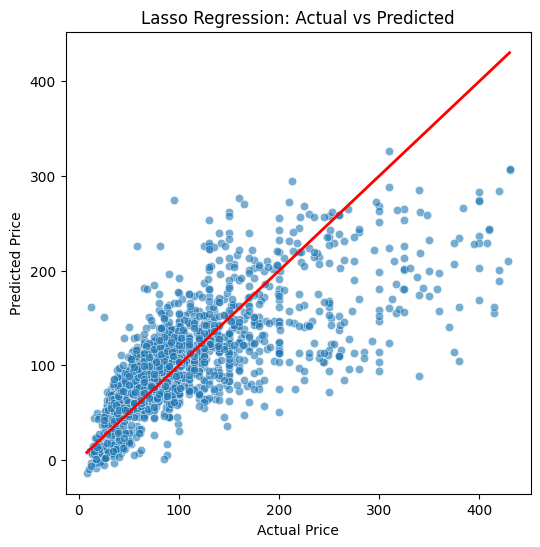

In [45]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression:\nMSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}")

# Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()


In [46]:
print(f"\nModel Comparison (R²):")
print(f"Linear: {r2_lr:.2f}")
print(f"Polynomial: {r2_poly:.2f}")
print(f"Ridge: {r2_ridge:.2f}")
print(f"Lasso: {r2_lasso:.2f}")


Model Comparison (R²):
Linear: 0.57
Polynomial: 0.59
Ridge: 0.57
Lasso: 0.57
